In [3]:
from embeddings.bridge_tower import get_bridgetower_combined_embeddings, BridgeTowerEmbeddings
from vectors.multimodal_lancedb import MultimodalLanceDB
from utils.utils import load_json_file
import lancedb
from utils.utils import display_retrieved_results

/Users/bhavikardeshna/miniconda3/envs/video-rag/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
embedder = BridgeTowerEmbeddings()

In [16]:
LANCEDB_HOST_FILE = "./data/.lancedb"
# declare table name
TBL_NAME = "test_tbl"
# initialize vectorstore
db = lancedb.connect(LANCEDB_HOST_FILE)

In [17]:
# open a connection to table TBL_NAME
tbl = db.open_table(TBL_NAME)

print(f"There are {tbl.to_pandas().shape[0]} rows in the table")
# display the first 3 rows of the table
tbl.to_pandas()[['text', 'image_path']].head(-30)


There are 64 rows in the table


,text,image_path
0,As I look back on the the mission that we've h...,./data/videos/video1/extracted_frame/frame_0.jpg
1,"on the International Space Station, I'm proud ...",./data/videos/video1/extracted_frame/frame_1.jpg
2,the science activities that happened over the ...,./data/videos/video1/extracted_frame/frame_2.jpg
3,two months.,./data/videos/video1/extracted_frame/frame_3.jpg
4,The view is always amazing,./data/videos/video1/extracted_frame/frame_4.jpg
5,I didn't think I would do another,./data/videos/video1/extracted_frame/frame_5.jpg
6,spacewalk and to now have the chance to have done,./data/videos/video1/extracted_frame/frame_6.jpg
7,four more was just icing on the cake for a,./data/videos/video1/extracted_frame/frame_7.jpg
8,a wonderful mission.,./data/videos/video1/extracted_frame/frame_8.jpg
9,Does the 10th one feel like the first one?,./data/videos/video1/extracted_frame/frame_9.jpg


In [8]:
# Creating a LanceDB vector store 
vectorstore = MultimodalLanceDB(
    uri=LANCEDB_HOST_FILE, 
    embedding=embedder, 
    table_name=TBL_NAME)

retriever = vectorstore.as_retriever(
    search_type='similarity', 
    search_kwargs={"k": 1}
)

/Users/bhavikardeshna/miniconda3/envs/video-rag/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of BridgeTowerForContrastiveLearning were not initialized from the model checkpoint at BridgeTower/bridgetower-large-itm-mlm-itc and are newly initialized: ['logit_scale']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


There is/are 2 retrieved result(s)

The caption of the 1-th retrieved result is:
"on the International Space Station, I'm proud to have been a part of much of"



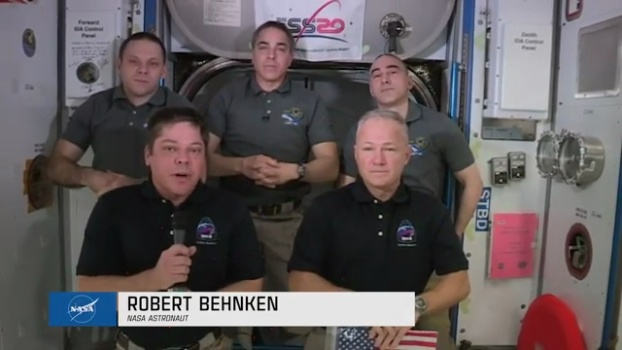

------------------------------------------------------------
The caption of the 2-th retrieved result is:
"after a 19-hour return journey from space."



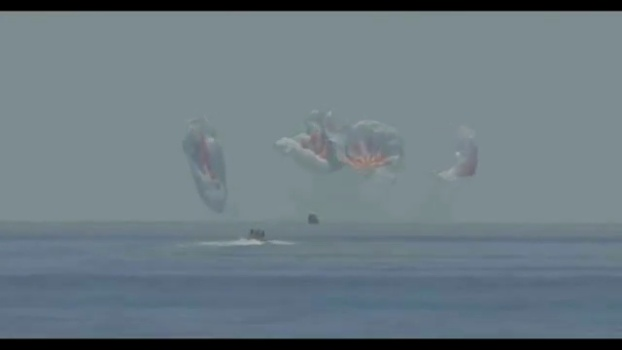

------------------------------------------------------------


In [18]:
text = "astronauts mission"
retrieved_video_segments = retriever.invoke(text)

retrieved_metadata = retrieved_video_segments[0].metadata['metadata']

frame_path = retrieved_metadata['extracted_frame_path']

display_retrieved_results(retrieved_video_segments)

In [19]:
from vlm import VLMConversationalBot

In [20]:
bot = VLMConversationalBot()

prompt = "Describe what is happening in this image."

# Get the bot's response
response = bot.converse(frame_path, prompt)
print(f"Bot's Response: {response}")


Loading checkpoint shards: 100%|██████████| 2/2 [00:00<00:00,  3.99it/s]
Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


Bot's Response: system
You are a helpful assistant.
user
  Describe what is happening in this image.
assistant
The image shows a group of five men in a space station. They are all dressed in gray shirts and are standing in front of a control panel. One of the men is holding a microphone, and the others are looking at the camera. The station has a blue and white color scheme.
